In [28]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: fix this lol
%cd ..
from helpers.labellines import *
%cd analysis/

c:\Users\kiera\Documents\apersonal_documents\formula\magic_moment_method
c:\Users\kiera\Documents\apersonal_documents\formula\magic_moment_method\analysis


In [29]:
df = pd.read_csv("MMM.csv")

tires = ["front_left", "front_right", "rear_left", "rear_right"]

for index, row in df.iterrows():
    # see if point is saturated (i.e. all 4 tires slip angles are saturated)
    # saturation will yield to useless data point since it will wrap back around with less acceleration
    # if not saturated, the point will be saved
    # TODO: Should 1 tire even be allowed to lift???
    saturated = not False in [[row[f"{tire}_tire_is_saturated"] for tire in tires]]

    normals = [[row[f"{tire}_tire_tire_centric_forces_2"] for tire in tires]]
    two_tires_lifting = sum([1 if (tire_normal == 0) else 0 for tire_normal in normals]) > 1

    if (saturated or two_tires_lifting or abs(row["roll"]* 180/np.pi) > 3):
        df.drop(index)

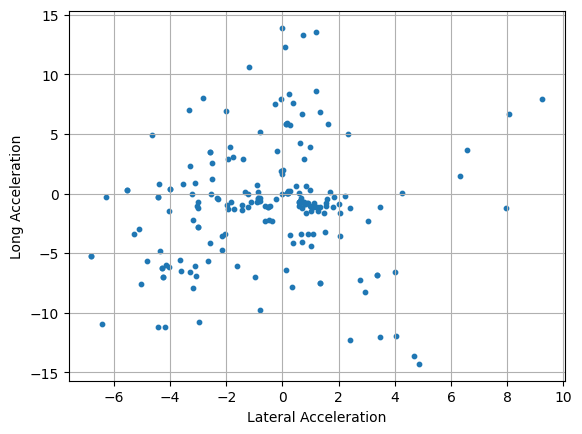

In [30]:

plt.scatter(df["vehicle_accelerations_NTB_1"], df["vehicle_accelerations_NTB_0"], s= 10)
plt.ylabel("Long Acceleration")
plt.xlabel("Lateral Acceleration")
plt.grid()

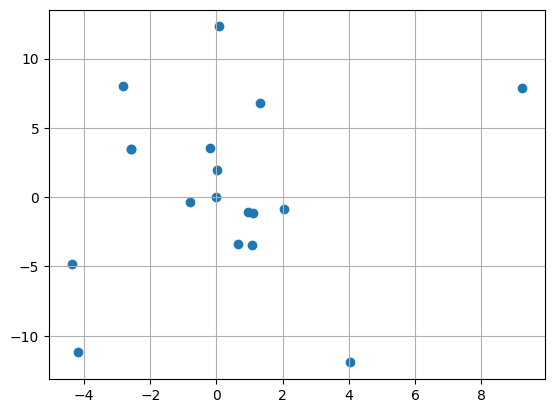

In [31]:
df2 = df[abs(df["yaw_acceleration"]) < 2]
df2 = df2[df2["vehicle_accelerations_NTB_0"] < 17]
df2 = df2[df2["vehicle_accelerations_NTB_0"] > -25]
df2 = df2[df2["vehicle_accelerations_NTB_1"] < 20]
plt.scatter(df2["vehicle_accelerations_NTB_1"], df2["vehicle_accelerations_NTB_0"])
plt.grid()

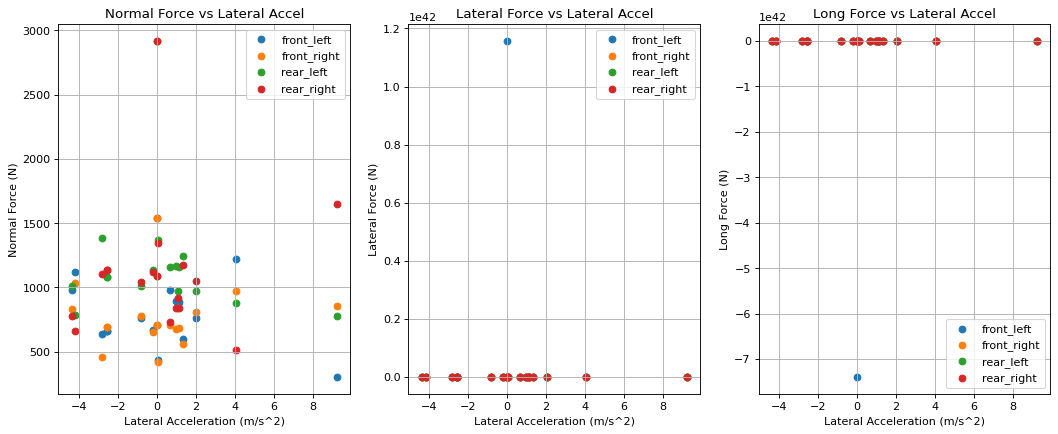

In [32]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

for tire in tires:
    axs[0].scatter(df2["vehicle_accelerations_NTB_1"], df2[f"{tire}_tire_tire_centric_forces_2"], label = tire)
axs[0].set_title("Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    axs[1].scatter(df2["vehicle_accelerations_NTB_1"], df2[f"{tire}_tire_vehicle_centric_forces_1"], label = tire)
axs[1].set_title("Lateral Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Lateral Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    axs[2].scatter(df2["vehicle_accelerations_NTB_1"], df2[f"{tire}_tire_tire_centric_forces_0"], label = tire)
axs[2].set_title("Long Force vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Long Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

(-100.0, 100.0)

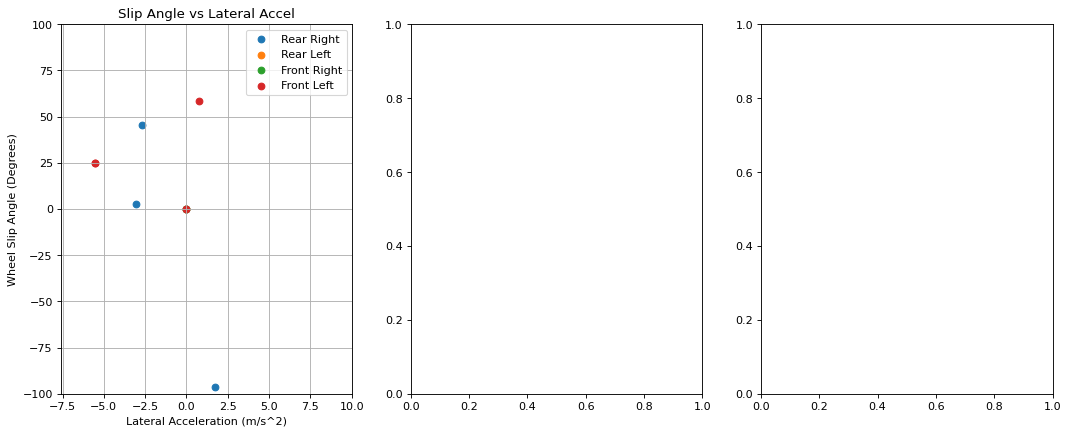

In [40]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)


axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['wheel_slip_ratios_2'], label='Rear Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['wheel_slip_ratios_3'], label='Rear Left')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['wheel_slip_ratios_1'], label='Front Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['wheel_slip_ratios_0'], label='Front Left')
axs[0].legend()
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Wheel Slip Angle (Degrees)')
axs[0].set_title("Slip Angle vs Lateral Accel")
axs[0].grid()
axs[0].set_ylim([-100, 100])